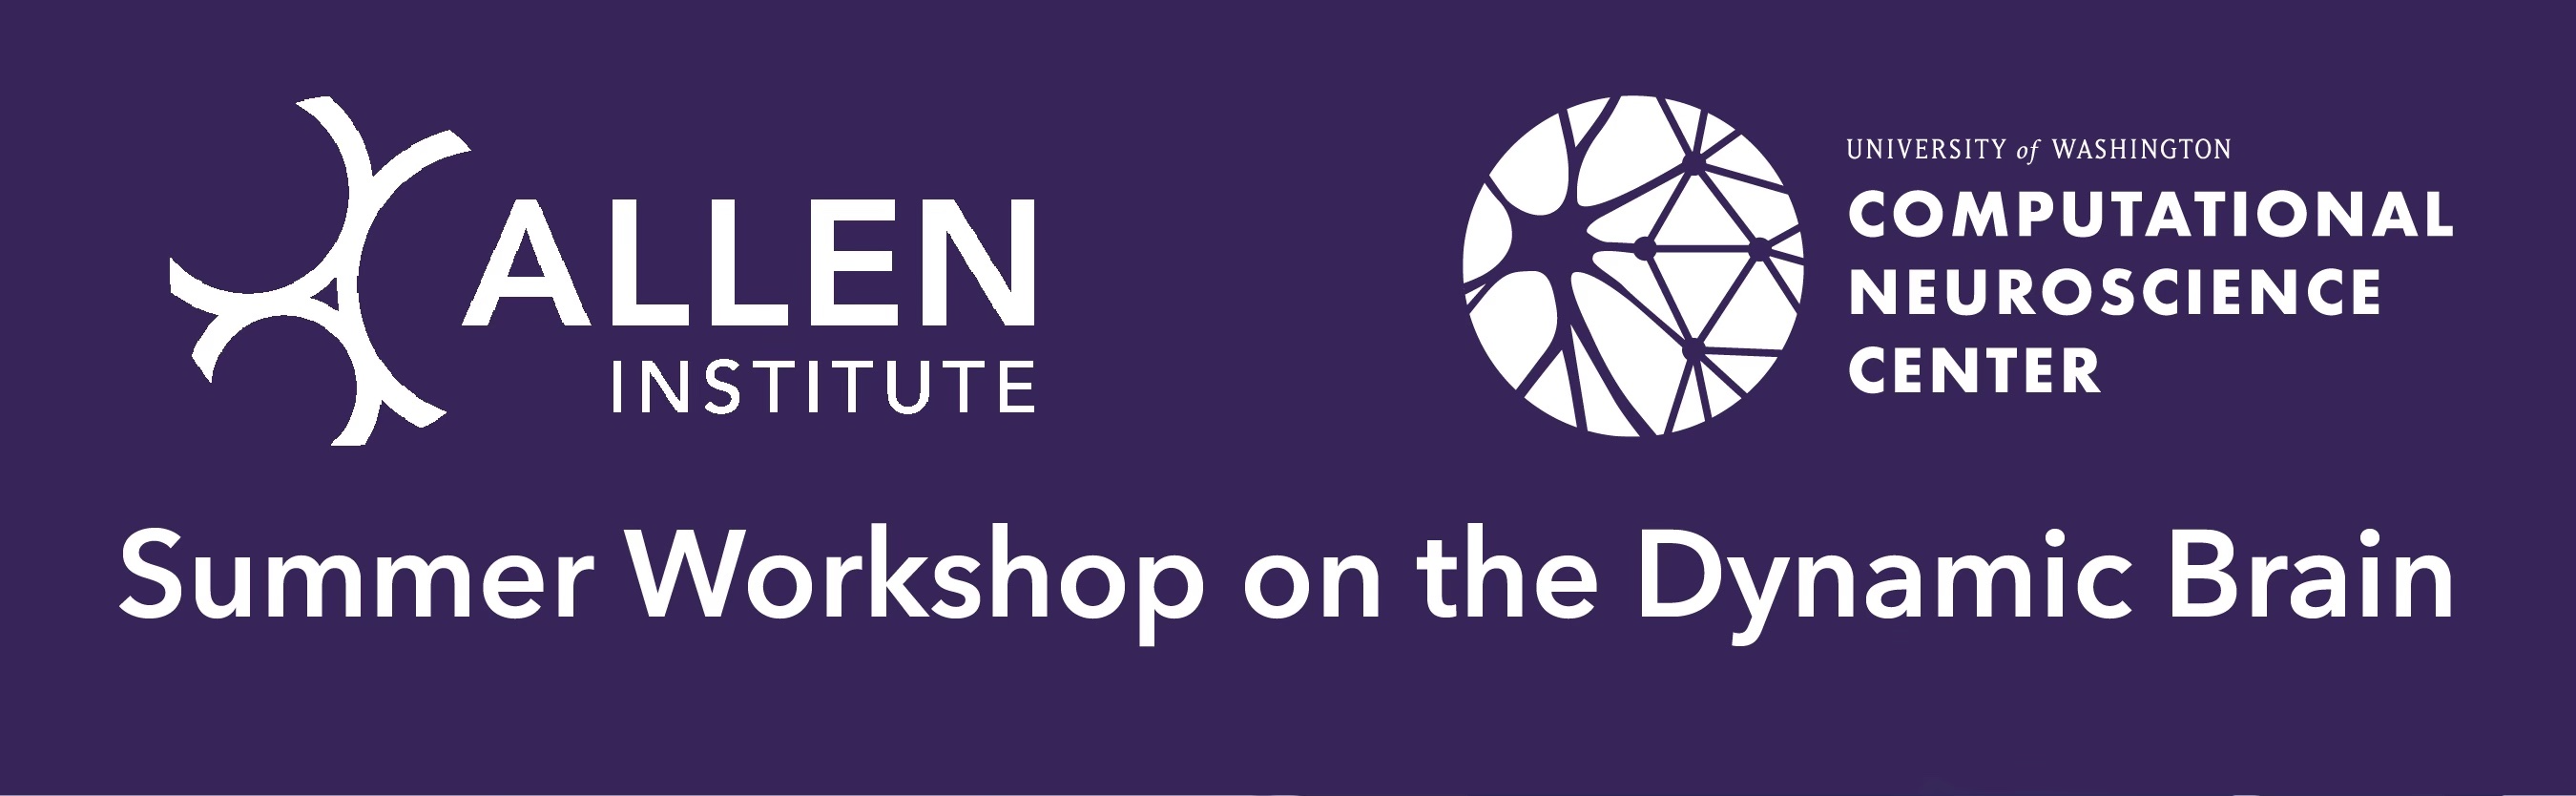

<h1 align="center">DAY 1 Workshop 1 SWDB 2025 </h1> 
<h3 align="center">Monday, August 25, 2025</h3> 
<h3 align="center">Introduction to the SWDB Datasets (AllenSDK)</h3> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
<h2>Objectives</h2>
    
On Day 1, we will provide an overview of how to load, inspect, and visualize the datasets made available for SWDB. We'll focus on how to find and access key information about the datasets to help you select a dataset for further inquiry. In this workshop, we'll walk through how to use the AllenSDK to access the Allen Brain Observatory datasets and metadata. 

</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Datasets </h2> 

Allen Brain Observatory Datasets 
* **Visual Behavior 2p**
    * **Visual Behavior**
    * Visual Behavior Task1B 
    * Visual Behavior Multiscope 
    * Visual Behavior Multiscope 4 areas x 2d
* Visual Behavior Neuropixels
* Visual Coding 2p 
* Visual Coding Neuropixels 
        
This workshop will walk through how to load and access the **Visual Behavior 2P** dataset, which measured the activity of genetically identified neurons in the visual cortex of mice performing a go/no-go visual change detection task. This dataset can be used to evaluate the influence of experience, expectation, and task engagement on neural coding and dynamics in excitatory and inhibitory cell populations. 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>SWDB Databook </h2> 

The databook is a resource for more in-depth information and code examples for all the SWDB datasets. 
[SWDB Data Book](https://allenswdb.github.io/intro.html) 


In [1]:
# general imports 
import matplotlib.pyplot as plt
import os
import seaborn as sns

import allensdk

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Load the Project Cache</h2> 
    
The code below shows how to use the VisualBehaviorOphysProjectCache class to load metadata tables and explore the features of the dataset. 

In [2]:
# import behavior project cache class from SDK to be able to load the data
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

cache_dir = '/root/capsule/data/'

cache = VisualBehaviorOphysProjectCache.from_local_cache(
            cache_dir=cache_dir, use_static_cache=True)

/opt/conda/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/conda/lib/python3.9/site-packages/allensdk/api/cloud_cache/cloud_cache.py:439: MissingLocalManifestWarning: This cache directory appears to contain data files, but it has no record of what those files are. You might want to consider running

NaturalMovieOneCache.construct_local_manifest()

to avoid needlessly downloading duplicates of data files that did not change between data releases. NOTE: running this method will require hashing every data file you have currently downloaded and could be very time consuming.

To avoid this warning in the future, make sure that

/root/capsule/data/resources/_downloaded_data.json

is not deleted between instantiations of this cache
  warnings.warn(msg, MissingLocalManifestWarning)
/opt/conda/lib/python3.9/

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Accessing the Project Metadata</h2>
Instatiating the cache downloads 4 project metadata files: 

1. behavior_session_table.csv
2. ophys_session_table.csv 
3. ophys_experiment_table.csv
4. ophys_cells_table.csv

Each one contains a table of information related to its file name. If you're using the AllenSDK, you don't have to worry about how these files are formatted. Instead, you'll load the relevant data using a specific accessor method: `get_behavior_session_table`, `get_ophys_session_table`, `get_ophys_experiment_table`, `get_ophys_cells_table`. These functions return a pandas DataFrame with a row for each item and a column for each metric. 

If you are analyzing data without the AllenSDK, you can load the data using your CSV file reader of choice. However, please be aware the columns in the original file do not necessarily match what's returned by the AllenSDK, which may combine information from multiple files to produce the final DataFrame. 

<h2>Sessions (Behavior and Ophys) vs Experiments </h2>  
    
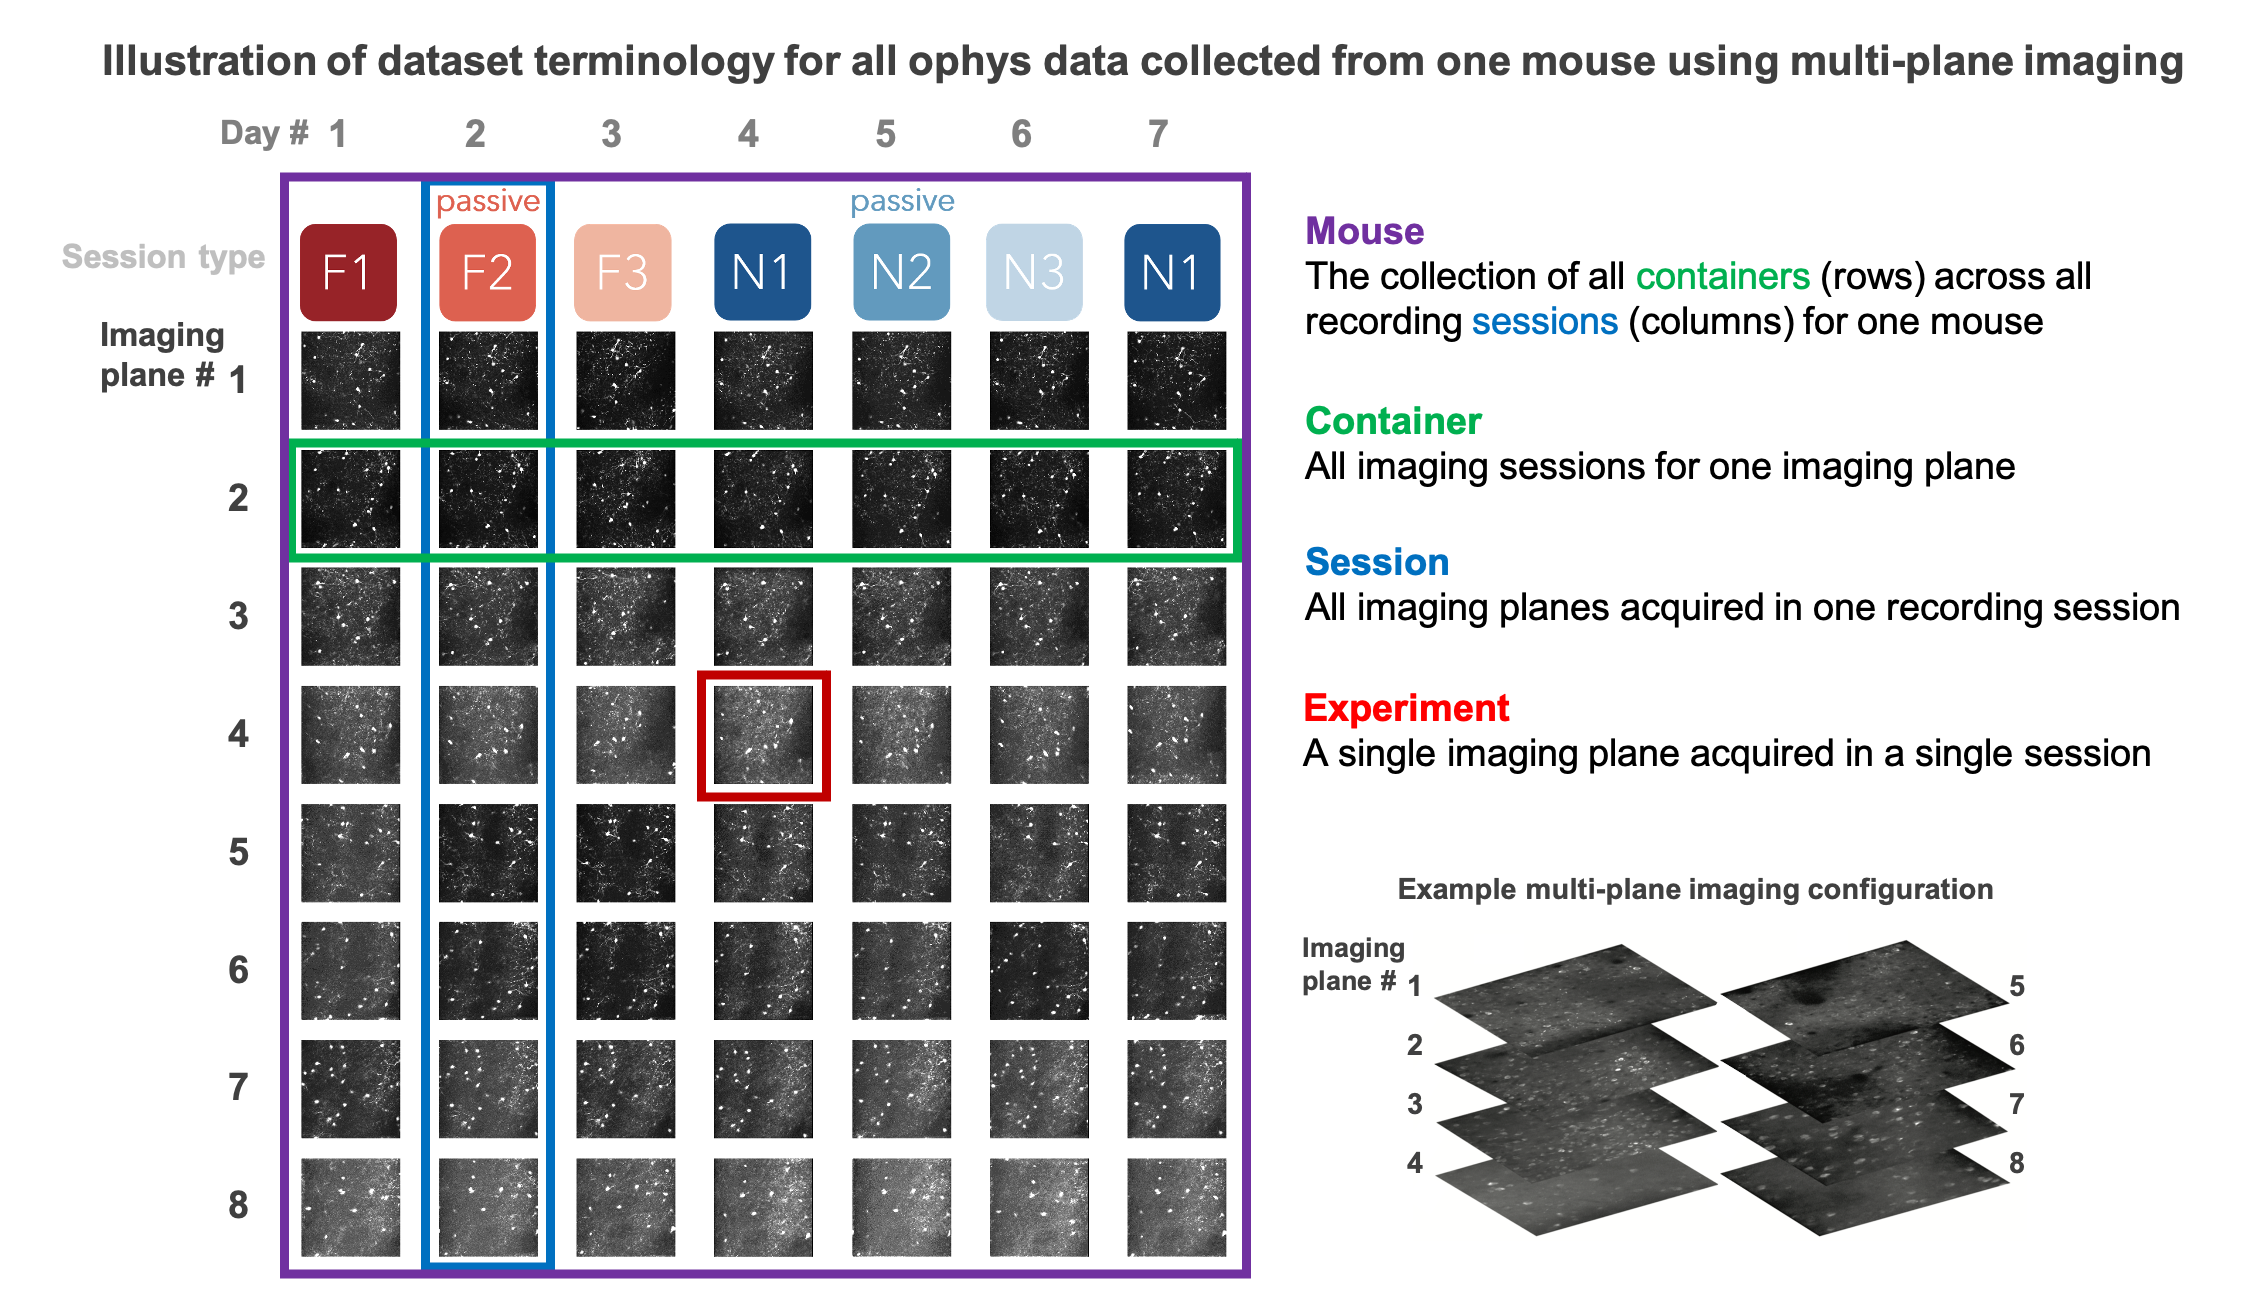


In [3]:
# Instantiate the project metadata using the AllenSDK 

behavior_sessions = cache.get_behavior_session_table()
ophys_sessions = cache.get_ophys_session_table()
ophys_experiments = cache.get_ophys_experiment_table()
ophys_cells = cache.get_ophys_cells_table()  

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Behavior sessions table</h2>  

The `behavior_sessions` DataFrame provides a high-level overview for behavior sessions in the Visual Behavior dataset. The index column (behavior_session_id is a unique ID, which serves as a key to access behavior data for each session. 
    
To add: column descriptions 
    
Note - ophys_session_id and ophys_container ID. The first few entries in this table are empty/contain NaNs. The behavior session table contains a row for behavior sessions that occurred during the training period and behavior sessions concurrent with optical physiology recordings. 

In [4]:
behavior_sessions.columns

Index(['ophys_session_id', 'ophys_container_id', 'mouse_id', 'indicator',
       'full_genotype', 'driver_line', 'cre_line', 'reporter_line', 'sex',
       'age_in_days', 'imaging_plane_group_count', 'project_code',
       'session_type', 'session_number', 'image_set', 'behavior_type',
       'experience_level', 'prior_exposures_to_session_type',
       'prior_exposures_to_image_set', 'prior_exposures_to_omissions',
       'date_of_acquisition', 'equipment_name', 'num_depths_per_area',
       'ophys_experiment_id', 'num_targeted_structures',
       'false_alarm_trial_count', 'file_id', 'go_trial_count', 'trial_count',
       'engaged_trial_count', 'hit_trial_count', 'correct_reject_trial_count',
       'catch_trial_count', 'miss_trial_count'],
      dtype='object')

In [5]:
behavior_sessions.head()

,ophys_session_id,ophys_container_id,mouse_id,indicator,full_genotype,driver_line,cre_line,reporter_line,sex,age_in_days,...,num_targeted_structures,false_alarm_trial_count,file_id,go_trial_count,trial_count,engaged_trial_count,hit_trial_count,correct_reject_trial_count,catch_trial_count,miss_trial_count
behavior_session_id,,,,,,,,,,,,,,,,,,,,,
870987812,<NA>,NaN,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,80,...,<NA>,0,1941,0,121,70,0,0,0,0
872953842,<NA>,NaN,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,84,...,<NA>,4,1942,293,564,27,18,45,49,275
873774125,<NA>,NaN,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,85,...,<NA>,3,1943,314,548,0,14,38,41,300
874790261,<NA>,NaN,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,86,...,<NA>,0,1944,326,492,0,14,42,42,312
875207834,<NA>,NaN,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,87,...,<NA>,3,1945,322,504,5,22,41,44,300


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
How many behavior sessions are in this dataset?

In [6]:
print(f"Total number of behavior sessions: {len(behavior_sessions)}")

Total number of behavior sessions: 4782


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Ophys Sessions Table</h2>  

The `ophys_sessions` DataFrame includes metadata information about optical physiology with behavior sessions. This DataFrame includes all of the metadata columns `behavior_session_table` with additional information unique to the ophys session. Only ophys session types that passed quality control are included in the table. 
    
to do - include description of all columns

In [7]:
ophys_sessions.columns

Index(['behavior_session_id', 'ophys_container_id', 'mouse_id', 'indicator',
       'full_genotype', 'driver_line', 'cre_line', 'reporter_line', 'sex',
       'age_in_days', 'imaging_plane_group_count', 'project_code',
       'session_type', 'session_number', 'image_set', 'behavior_type',
       'experience_level', 'prior_exposures_to_session_type',
       'prior_exposures_to_image_set', 'prior_exposures_to_omissions',
       'date_of_acquisition', 'equipment_name', 'num_depths_per_area',
       'ophys_experiment_id', 'num_targeted_structures'],
      dtype='object')

In [8]:
ophys_sessions.head()

,behavior_session_id,ophys_container_id,mouse_id,indicator,full_genotype,driver_line,cre_line,reporter_line,sex,age_in_days,...,behavior_type,experience_level,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,date_of_acquisition,equipment_name,num_depths_per_area,ophys_experiment_id,num_targeted_structures
ophys_session_id,,,,,,,,,,,,,,,,,,,,,
951410079,951520319,"[1018028339, 1018028342, 1018028345, 101802835...",457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,206,...,active_behavior,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,4,"[951980471, 951980473, 951980475, 951980479, 9...",2
952430817,952554548,"[1018028339, 1018028345, 1018028354, 1018028357]",457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,209,...,passive_viewing,Familiar,0,66,1,2019-09-23 08:45:38.490000+00:00,MESO.1,4,"[953659743, 953659745, 953659749, 953659752]",2
954954402,953982960,"[1018028339, 1018028342, 1018028345, 101802835...",457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,210,...,active_behavior,Familiar,0,67,2,2019-09-24 09:01:31.582000+00:00,MESO.1,4,"[958527464, 958527471, 958527474, 958527479, 9...",2
955775716,956010809,"[1018028339, 1018028342, 1018028345]",457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,212,...,active_behavior,Familiar,1,68,3,2019-09-26 09:22:21.772000+00:00,MESO.1,4,"[956941841, 956941844, 956941846]",2
957020350,957032492,"[1018028339, 1018028342, 1018028345, 101802835...",457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,213,...,active_behavior,Novel 1,0,0,4,2019-09-27 08:58:37.005000+00:00,MESO.1,4,"[957759562, 957759564, 957759566, 957759570, 9...",2


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
How many ophys sessions are in this dataset? 

In [9]:
print(f"Total number of ophys sessions: {len(ophys_sessions)}\n")

Total number of ophys sessions: 703



<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Ophys Experiment Table</h2>  

The `ophys_experiments` DataFrame contains all ophys data that is available for analysis, organized by the `ophys_experiment_id` associated with a single imaging plane in a single session. 
    
The `ophys_experiment_table` contains all the columns in the `ophys_session_table` and `behavior_session_table` plus a few additional columns specific to individual imaging planes, including: `imaging_depth` and `targeted_structure`. 

To do: add description of all columns

In [10]:
ophys_experiments.columns

Index(['behavior_session_id', 'ophys_session_id', 'ophys_container_id',
       'mouse_id', 'indicator', 'full_genotype', 'driver_line', 'cre_line',
       'reporter_line', 'sex', 'age_in_days', 'imaging_depth',
       'targeted_structure', 'targeted_imaging_depth', 'imaging_plane_group',
       'project_code', 'session_type', 'session_number', 'image_set',
       'behavior_type', 'passive', 'experience_level',
       'prior_exposures_to_session_type', 'prior_exposures_to_image_set',
       'prior_exposures_to_omissions', 'date_of_acquisition', 'equipment_name',
       'published_at', 'isi_experiment_id', 'file_id'],
      dtype='object')

In [11]:
ophys_experiments = cache.get_ophys_experiment_table()
ophys_experiments.head()

,behavior_session_id,ophys_session_id,ophys_container_id,mouse_id,indicator,full_genotype,driver_line,cre_line,reporter_line,sex,...,passive,experience_level,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,date_of_acquisition,equipment_name,published_at,isi_experiment_id,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
951980471,951520319,951410079,1018028342,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,0
951980473,951520319,951410079,1018028345,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,1
951980475,951520319,951410079,1018028339,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,2
951980479,951520319,951410079,1018028354,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,3
951980481,951520319,951410079,1018028357,457841,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Familiar,0,65,0,2019-09-20 09:59:38.837000+00:00,MESO.1,2021-03-25,848974280,4


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
How many ophys experiments are in this dataset? 

In [12]:
print(f"Total number of ophys experiments: {len(ophys_experiments)}\n")


Total number of ophys experiments: 1936



<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Ophys Cells Table</h2>  

The same population of neurons were targeted across multiple recording sessions, allowing us to track the activity of single neurons across days. The imaging planes across sessions were registered so that we could identify the same neuron across recording sessions. Each neuron was given a number id: cell_roi_id which can be found in the `ophys_cells_table` along with other unique identifiers. 

In [13]:
# get the ophys_cells_table
ophys_cells_table = cache.get_ophys_cells_table()  

ophys_cells_table.head()

,ophys_experiment_id,cell_specimen_id
cell_roi_id,,
1080884343,775614751,1086496928
1080884173,775614751,1086496914
1080883843,775614751,1086496838
1080886674,775614751,1086491756
1080885658,775614751,1086491699


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Visual Behavior Ophys Projects</h2>  

The Visual Behavior Ophys dataset encapsulates 4 different projects that use different iterations of the behavior paradigm and recording set-up. 
    
The `behavior_sessions`, `ophys_sessions`, `ophys_experiments`, and `ophys_cells_table` DataFrames aggregate metadata across the projects. We can use the `project_code` column in the `behavior_sessions`, `ophys_session`, and `ophys_experiments` to filter for sessions specific to a project of interest. 

In [14]:
behavior_sessions.project_code.unique().tolist()

['VisualBehaviorMultiscope',
 'VisualBehaviorTask1B',
 'VisualBehavior',
 'VisualBehaviorMultiscope4areasx2d']

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    <h2>Load the dataset</h2>
    
Let's load the data for the **Visual Behavior** project and plot the neural activity, stimulus, and behavior information for a select session. 


In [15]:
# Filter DataFrames for Visual Behavior project 

project = 'VisualBehavior' 

filtered_behavior_sessions = behavior_sessions[behavior_sessions.project_code == project] 
filtered_ophys_sessions = ophys_sessions[ophys_sessions.project_code == project] 
filtered_ophys_experiments = ophys_experiments[ophys_experiments.project_code == project] 

# Filter ophys cells table based on ophys experiment id 
filtered_ophys_cells_table = ophys_cells[ophys_cells.ophys_experiment_id.isin(filtered_ophys_experiments.index.tolist())]


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise:** What transgenic lines were used in this dataset? 
</div>

In [16]:
filtered_behavior_sessions.full_genotype.unique().tolist()

['Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt',
 'Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai94(TITL-GCaMP6s)/wt',
 'Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/wt',
 'Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt']

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise:** How many ophys sessions are part of this dataset? 
</div>

In [17]:
len(filtered_ophys_sessions)

239

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise:** How many unique cells were recorded in this dataset? 
</div>

In [18]:
len(filtered_ophys_cells_table)

41666

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h4>Load the experiment data</h4>       

We can use the `get_ophys_experiment()` method to return a python object containing all the data and metadata for an experiment using the `ophys_experiment_id`. We can select an experiment of interest by filtering the `ophys_experiments` table based on specific experimental conditions. 
    
Let's select experiments from mice from the **Sst-IRES-Cre** Driver Line, also called a ’Cre line’, as well as filter by session_number to identify experiments from the first session with the novel images, which always has a session_type starting with **OPHYS_4**, and can be identified using the abbreviated session_number column which is agnostic to which specific image set was used). You can use the **prior_exposures_to_image_set** column to ensure that the session was truly the first day with the novel image set, and not a retake of the same session_type.

In [19]:
# get all Sst experiments for ophys session 4
selected_experiment_table = filtered_ophys_experiments[(filtered_ophys_experiments.cre_line=='Sst-IRES-Cre')&
                        (filtered_ophys_experiments.session_number==4) &
                        (filtered_ophys_experiments.prior_exposures_to_image_set==0)]

print('Number of experiments: {}'.format(len(selected_experiment_table)))
selected_experiment_table

Number of experiments: 6


,behavior_session_id,ophys_session_id,ophys_container_id,mouse_id,indicator,full_genotype,driver_line,cre_line,reporter_line,sex,...,passive,experience_level,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,date_of_acquisition,equipment_name,published_at,isi_experiment_id,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
1051423446,1051341605,1051327401,1049224697,533527,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),M,...,False,Novel 1,0,0,4,2020-09-18 09:56:47.898000+00:00,CAM2P.3,2021-03-25,1038936025,461
1008318518,1008030870,1008005573,1006071814,495789,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),M,...,False,Novel 1,0,0,3,2020-02-18 09:11:02.280000+00:00,CAM2P.3,2021-03-25,985894742,552
1083070132,1083001647,1082988691,1080284671,546819,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),M,...,False,Novel 1,0,0,4,2021-02-10 12:53:23.145000+00:00,CAM2P.3,2021-08-12,1056468289,737
1044095203,1044011835,1043989533,1039579201,524274,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),M,...,False,Novel 1,0,0,5,2020-08-18 12:41:20.112000+00:00,CAM2P.4,2021-03-25,1027448106,904
1085000574,1084914230,1084882685,1081683701,549976,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),M,...,False,Novel 1,0,0,4,2021-02-18 09:38:44.980000+00:00,CAM2P.4,2021-08-12,1059649397,1728
965228792,965034185,964912357,957024596,467302,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),M,...,False,Novel 1,0,0,6,2019-10-10 11:40:43.640000+00:00,CAM2P.5,2021-03-25,894191516,1876


In [20]:
# select first experiment from the table to look at in more detail 
ophys_experiment_id = selected_experiment_table.index[0]

# load the data for this ophys experiment from the cache
ophys_experiment = cache.get_behavior_ophys_experiment(ophys_experiment_id)

/opt/conda/lib/python3.9/site-packages/hdmf/spec/namespace.py:583: UserWarning: Ignoring the following cached namespace(s) because another version is already loaded:
core - cached version: 2.6.0-alpha, loaded version: 2.7.0
The loaded extension(s) may not be compatible with the cached extension(s) in the file. Please check the extension documentation and ignore this warning if these versions are compatible.
  self.warn_for_ignored_namespaces(ignored_namespaces)


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h4>Inspect the experiment object attributes</h4>
Using the `list_data_attributes_and_methods()` method will show us all of the attributes of the `ophys_experiment` object. 

In [21]:
attributes = ophys_experiment.list_data_attributes_and_methods()
attributes

['average_projection',
 'behavior_session_id',
 'cell_specimen_table',
 'corrected_fluorescence_traces',
 'demixed_traces',
 'dff_traces',
 'events',
 'eye_tracking',
 'eye_tracking_rig_geometry',
 'get_cell_specimen_ids',
 'get_cell_specimen_indices',
 'get_dff_traces',
 'get_performance_metrics',
 'get_reward_rate',
 'get_rolling_performance_df',
 'get_segmentation_mask_image',
 'licks',
 'max_projection',
 'metadata',
 'motion_correction',
 'neuropil_traces',
 'ophys_experiment_id',
 'ophys_session_id',
 'ophys_timestamps',
 'raw_running_speed',
 'rewards',
 'roi_masks',
 'running_speed',
 'segmentation_mask_image',
 'stimulus_presentations',
 'stimulus_templates',
 'stimulus_timestamps',
 'task_parameters',
 'trials',
 'update_targeted_imaging_depth']

In [22]:
# Use ? <attribute> to view the docstring 

?ophys_experiment.average_projection

Type:        property
String form: <property object at 0x7f0d84fe2810>
Docstring:  
2D image of the microscope field of view, averaged across the
experiment
:rtype: allensdk.brain_observatory.behavior.image_api.Image

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h4>Experiment Metadata</h4>
 
The metadata attribute will output metadata for this specific experiment. 

In [23]:
ophys_experiment.metadata

{'equipment_name': 'CAM2P.3',
 'sex': 'M',
 'age_in_days': 124,
 'stimulus_frame_rate': 60.0,
 'session_type': 'OPHYS_4_images_B',
 'date_of_acquisition': datetime.datetime(2020, 9, 18, 9, 56, 47, 898000, tzinfo=tzutc()),
 'reporter_line': 'Ai148(TIT2L-GC6f-ICL-tTA2)',
 'cre_line': 'Sst-IRES-Cre',
 'behavior_session_uuid': UUID('1fd7d62f-2e6c-47a4-a29b-978f2bed9cec'),
 'driver_line': ['Sst-IRES-Cre'],
 'mouse_id': '533527',
 'project_code': 'VisualBehavior',
 'full_genotype': 'Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt',
 'behavior_session_id': 1051341605,
 'indicator': 'GCaMP6f',
 'emission_lambda': 520.0,
 'excitation_lambda': 910.0,
 'ophys_container_id': 1049224697,
 'field_of_view_height': 512,
 'field_of_view_width': 452,
 'imaging_depth': 275,
 'targeted_imaging_depth': 275,
 'imaging_plane_group': None,
 'imaging_plane_group_count': 0,
 'ophys_experiment_id': 1051423446,
 'ophys_frame_rate': 31.0,
 'ophys_session_id': 1051327401,
 'targeted_structure': 'VISp'}

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h4>Experiment Metadata</h4>
    
Average project image for this imaging plane.

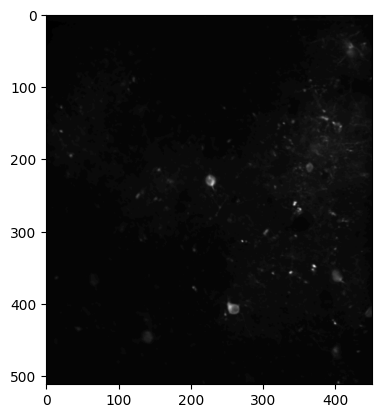

In [31]:
plt.imshow(ophys_experiment.average_projection, cmap='gray')
plt.show()

In [37]:
# Get normalized fluorescence traces 

dff_traces = ophys_experiment.dff_traces
dff_traces.head()

,cell_roi_id,dff
cell_specimen_id,,
1086611102,1080641736,"[0.1506316214799881, 0.08875097334384918, 0.13..."
1086611700,1080641746,"[0.2113184630870819, 0.3112851679325104, 0.246..."
1086611364,1080641750,"[0.22939619421958923, 0.16880697011947632, 0.1..."
1086611480,1080641753,"[0.4773722290992737, 0.6015625596046448, 0.231..."
1086612178,1080641759,"[0.28374695777893066, 0.4014606177806854, 0.37..."


In [33]:
# Get deconvolved events 

events = ophys_experiment.events 
events.head()

,cell_roi_id,events,filtered_events,lambda,noise_std
cell_specimen_id,,,,,
1086611102,1080641736,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0513,0.057753
1086611700,1080641746,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0584,0.061786
1086611364,1080641750,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0591,0.062072
1086611480,1080641753,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0704,0.067773
1086612178,1080641759,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0626,0.064629


In [38]:
# Get ophys timestamps 

ophys_timestamps = ophys_experiment.ophys_timestamps
ophys_timestamps 

array([2.23630000e+00, 2.26860000e+00, 2.30090000e+00, ...,
       4.52949636e+03, 4.52952868e+03, 4.52956100e+03])

/tmp/ipykernel_241/329253315.py:5: MatplotlibDeprecationWarning: Passing label as a length 7 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  ax.plot(ophys_timestamps, events.iloc[0]['events'], color=sns.color_palette()[0], label=events)


Text(0, 0.5, 'dF/F')

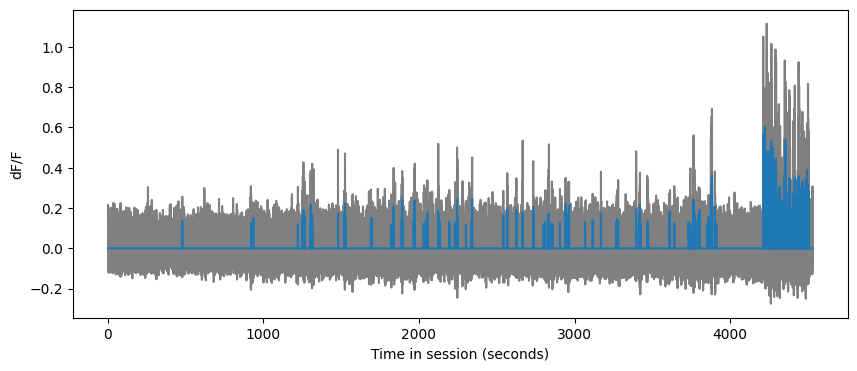

In [39]:
# Plot dF/F and events for one cell 

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(ophys_timestamps, dff_traces.iloc[0]['dff'], color='gray', label='dF/F')
ax.plot(ophys_timestamps, events.iloc[0]['events'], color=sns.color_palette()[0], label=events)
ax.set_xlabel('Time in session (seconds)')
ax.set_ylabel('dF/F')

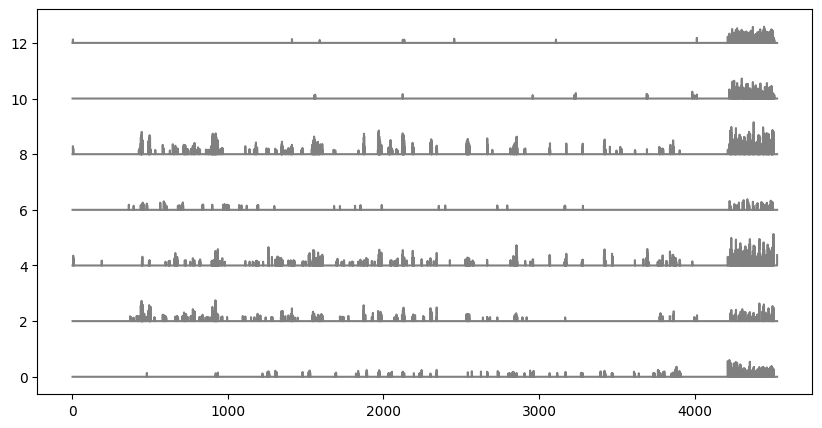

In [45]:
# Plot events for all cells 

fig, ax = plt.subplots(figsize=(10, 5))
for i, cell_specimen_id in enumerate(events.index.values): 
    ax.plot(ophys_timestamps, events.loc[cell_specimen_id]['events']+(i*2), color='gray')  

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h4>Plot neural activity alongside stimuli</h4>

Get the stimulus_presentations table for this experiment and plot the stimulus blocks along with the traces 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Using metadata to find information about the dataset </h2> 

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise:** Together, we'll construct a super-table with key information that helps us understand the features and constraints of each dataset. Form small groups and we will assign you a dataset to scrape the metadata fields to fill out the table. 
</div>

Field Descriptions: 
* modality 
* timescale
* anatomy (brain area, depth) 
* cell type
* population size
* stimuli (visual stim, rewards) 
* behavioral measures (running, etc) 
* manipulation (optogenetics, drugs, anesthesia, etc) 

In [ ]:
# Set column and dataset names 
column_names = ['dataset', 'modality', 'timescale', 'anatomy', 'cell_type', 'population_size', 'stimuli', 'behavioral_measures', 'manipulation'] 
dataset_names = ['Visual Coding 2p', 'Visual Coding NP', 'Visual Beh 2p', 'Visual Beh NP', 'V1DD 2p', 'V1DD EM', 'CTLUT NP', 'NP Ultra Psych', 'BCI 2p', 'Dynamic Foraging'] 

# Construct table 
metadata_table_template = pd.DataFrame(columns=column_names)
metadata_table_template.dataset = dataset_names

metadata_table_template

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Discussion:** 
Select a dataset and discuss: 
1. What interests you about the dataset? What are unique features that distinguish it from others? 
2. What are some scientific questions you could answer with this dataset? What are the next steps you would take to approach the question? 
2. Are there any limitations to consider or uncertainties to verify before working with this dataset? 
</div>